<a href="https://colab.research.google.com/github/BiszakAletta/FAKT.ML.kurzus/blob/main/masodikhazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aktivizációs függvények

In [ ]:
from math import e
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def sigmoid(x):
  y= 1/(1+e**-x)
  return y

In [ ]:
sigmoid(2)

0.8807970779778823

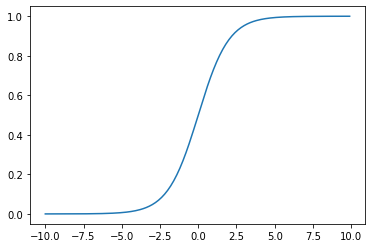

In [ ]:
x=np.arange(-10,10,0.1)
y= sigmoid(x)
plt.plot(x, y)

In [ ]:
def tanh(x):
  y=(e**x-e**-x)/(e**x+e**-x)
  return y

In [ ]:
tanh(3)

0.9950547536867306

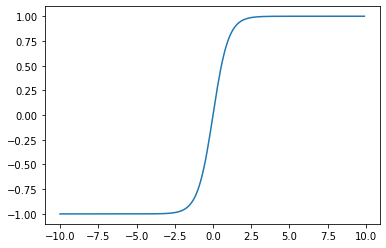

In [ ]:
a=np.arange(-10,10,0.1)
b= tanh(x)
plt.plot(a,b)

In [2]:
import pandas as pd


In [ ]:
#Adatok

In [1]:
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/My Drive/Machine learning FAKT/CO2 Emissions_Canada.csv')

In [6]:
df.head


<bound method NDFrame.head of        Make        Model  ... Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)
0     ACURA          ILX  ...                          33                  196
1     ACURA          ILX  ...                          29                  221
2     ACURA   ILX HYBRID  ...                          48                  136
3     ACURA      MDX 4WD  ...                          25                  255
4     ACURA      RDX AWD  ...                          27                  244
...     ...          ...  ...                         ...                  ...
7380  VOLVO  XC40 T5 AWD  ...                          30                  219
7381  VOLVO  XC60 T5 AWD  ...                          29                  232
7382  VOLVO  XC60 T6 AWD  ...                          27                  240
7383  VOLVO  XC90 T5 AWD  ...                          29                  232
7384  VOLVO  XC90 T6 AWD  ...                          26                  248

[7385 rows x 12 colum

In [7]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
laberer = LabelEncoder()

In [9]:
df = df.rename(columns = {'Vehicle Class': 'Vehicle', 'Fuel Type': 'Fuel', 'CO2 Emissions(g/km)': 'CO2'}, inplace = False)


In [50]:
df.Make = laberer.fit_transform(df.Make)
df.Model = laberer.fit_transform(df.Model)
df.Vehicle = laberer.fit_transform(df.Vehicle)
df.Fuel = laberer.fit_transform(df.Fuel)
df.Transmission = laberer.fit_transform(df.Transmission)

In [11]:
df.head()

,Make,Model,Vehicle,Engine Size(L),Cylinders,Transmission,Fuel,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [51]:
y_df = df.CO2

In [52]:
x_df = df.copy().drop('CO2', axis=1)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, shuffle=True)

In [54]:
#Adat normalizálás

In [55]:
normalizer = StandardScaler()

In [56]:
normalizer.fit(x_train)

StandardScaler()

In [58]:
x_train = normalizer.transform(x_train)
x_test = normalizer.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [59]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.601959,-1.775164,-1.455489,-2.977789,-3.565610,-1.903590,-2.724859,-3.810869,-4.457603,-4.083607,-3.652081
1,-1.821649,-1.773415,-1.498315,-2.977789,-3.565610,-1.903590,-2.724859,-3.585628,-4.118753,-3.812579,-3.803731
2,-1.790264,-1.775814,-1.498315,-2.759498,-3.565610,-1.714548,-3.992559,-3.762603,-4.457603,-4.036472,-3.689993
3,-1.570574,-1.772369,-1.327012,-0.958598,-2.368808,-1.903590,-3.992559,-3.135145,-3.022475,-3.152685,-3.974339
4,-1.837341,-1.774297,-1.155709,-1.668044,-2.368808,-1.865782,-2.724859,-3.489095,-3.999159,-3.694741,-3.841644
...,...,...,...,...,...,...,...,...,...,...,...
6641,-1.774572,-1.775637,-1.112883,-2.159198,-2.967209,-1.903590,-3.992559,-3.513228,-3.999159,-3.718309,-3.822688
6642,-1.758880,-1.772986,-1.327012,-1.176889,-2.368808,-2.092632,-3.992559,-3.384519,-3.680242,-3.529767,-3.879557
6643,-1.805957,-1.776231,-1.498315,-3.305225,-3.565610,-1.714548,-3.992559,-3.851091,-4.597129,-4.154310,-3.614168
6644,-1.719650,-1.775964,-1.112883,-2.759498,-3.565610,-2.073728,-3.992559,-3.682160,-4.258279,-3.918634,-3.746862


In [60]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.040890,-0.264814,1.377892,-0.862882,-0.890529,0.414588,0.836733,-0.677475,-0.563989,-0.618785,0.491520
1,0.756312,1.099757,1.377892,2.092052,3.485409,0.277095,0.836733,1.166091,0.953963,1.097594,-1.022982
2,0.756312,1.096293,1.377892,1.131698,1.297440,0.277095,0.836733,0.570477,0.239633,0.445370,-0.609936
3,-0.926671,-0.709858,0.757061,2.239798,1.297440,1.514527,0.836733,0.655565,0.373570,0.548353,-0.747618
4,-0.572359,-0.398154,1.170948,0.245218,0.203455,0.139603,-0.289189,1.024278,1.266482,1.131922,-1.022982
...,...,...,...,...,...,...,...,...,...,...,...
734,1.199203,-1.754066,-0.070715,0.319091,0.203455,-1.235322,-0.289189,0.542115,0.507506,0.548353,-0.747618
735,-0.926671,1.091098,-0.070715,1.574938,1.297440,-1.235322,-0.289189,0.230127,0.418215,0.273732,-0.472254
736,0.844890,-0.834539,0.757061,-1.158375,-0.890529,1.514527,0.836733,-0.989463,-1.055091,-1.030716,1.042249
737,0.756312,-1.386948,0.757061,-0.862882,-0.890529,-0.685352,0.836733,-0.819287,-1.010445,-0.893406,0.904567


In [61]:
#Architektúra

In [62]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.metrics import MeanSquaredError
import tensorflow

In [63]:
input = Input(shape=(x_train.shape[1]))
x = Dense(32, activation='relu')(input)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation= 'linear')(x)

In [64]:
model = keras.Model(input, output)

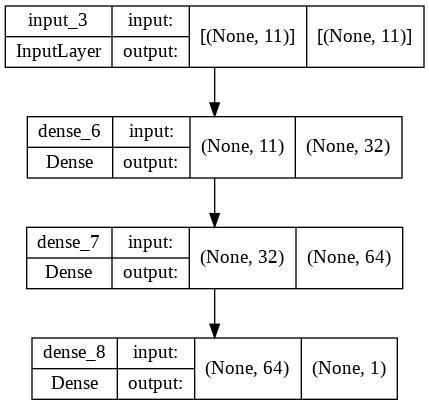

In [65]:
plot_model(model, show_shapes=True)

In [66]:
model.compile(
    loss='MSE',
    metrics=[tensorflow.keras.metrics.MeanSquaredError()])


In [67]:
model.fit(x=x_train, y=y_train, epochs=50)

Epoch 1/50
208/208 [==============================] - 1s 2ms/step - loss: 29990.3359 - mean_squared_error: 29990.3359
Epoch 2/50
208/208 [==============================] - 0s 2ms/step - loss: 5231.5181 - mean_squared_error: 5231.5181
Epoch 3/50
208/208 [==============================] - 0s 2ms/step - loss: 4095.0374 - mean_squared_error: 4095.0374
Epoch 4/50
208/208 [==============================] - 0s 2ms/step - loss: 2839.7014 - mean_squared_error: 2839.7014
Epoch 5/50
208/208 [==============================] - 0s 2ms/step - loss: 1553.2909 - mean_squared_error: 1553.2909
Epoch 6/50
208/208 [==============================] - 0s 2ms/step - loss: 810.6996 - mean_squared_error: 810.6996
Epoch 7/50
208/208 [==============================] - 0s 2ms/step - loss: 690.5405 - mean_squared_error: 690.5405
Epoch 8/50
208/208 [==============================] - 0s 2ms/step - loss: 624.0127 - mean_squared_error: 624.0127
Epoch 9/50
208/208 [==============================] - 0s 2ms/step - loss: 56

In [68]:
model.predict(x_test)

array([[ 8.94795299e-01],
       [ 2.50874817e+02],
       [ 1.13546791e+02],
       [ 2.89859680e+02],
       [ 3.39263977e+02],
       [ 1.65155182e+02],
       [ 1.22713600e+02],
       [ 2.17567444e+02],
       [ 6.68822556e+01],
       [ 4.09397583e+02],
       [ 3.81246033e+02],
       [ 2.89718445e+02],
       [ 3.25716095e+01],
       [ 3.76834965e+00],
       [-6.54332829e+00],
       [ 9.48376536e-01],
       [ 2.95590118e+02],
       [ 5.62378502e+01],
       [ 7.22498322e+00],
       [ 3.21352325e+02],
       [ 4.07321686e+02],
       [ 3.71151520e+02],
       [ 9.64327927e+01],
       [ 2.43362656e+02],
       [-3.70766997e+00],
       [-8.12636662e+00],
       [ 1.76862030e+02],
       [ 1.42801797e+00],
       [ 6.63950806e+01],
       [ 4.43014669e+00],
       [ 2.14484329e+01],
       [ 1.54808748e+00],
       [ 1.86634491e+02],
       [-6.68538475e+00],
       [ 1.70985508e+01],
       [ 2.17567444e+02],
       [ 1.41959778e+02],
       [ 2.01274536e+02],
       [ 8.3

In [69]:
model.evaluate(x = x_test, y = y_test)

24/24 [==============================] - 0s 1ms/step - loss: 26063.7871 - mean_squared_error: 26063.7871


[26063.787109375, 26063.787109375]